![A soccer pitch for an international match.](data/soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

# Loading and exploring the data

In [161]:
# Start your code here!
import pandas as pd

men = pd.read_csv('men_results.csv', parse_dates=["date"])
women = pd.read_csv('women_results.csv', parse_dates=["date"])

In [162]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [163]:
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [164]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  44353 non-null  int64         
 1   date        44353 non-null  datetime64[ns]
 2   home_team   44353 non-null  object        
 3   away_team   44353 non-null  object        
 4   home_score  44353 non-null  int64         
 5   away_score  44353 non-null  int64         
 6   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.4+ MB


In [165]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4884 non-null   int64         
 1   date        4884 non-null   datetime64[ns]
 2   home_team   4884 non-null   object        
 3   away_team   4884 non-null   object        
 4   home_score  4884 non-null   int64         
 5   away_score  4884 non-null   int64         
 6   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 267.2+ KB


In [166]:
for col in men.select_dtypes(include='object').columns:
    print(f"Value counts for column '{col}':")
    print(men[col].value_counts())
    print()  # Blank line for readability


Value counts for column 'home_team':
Brazil                       594
Argentina                    570
Mexico                       555
Germany                      526
England                      525
                            ... 
Chameria                       1
Romani people                  1
Saint Pierre and Miquelon      1
Western Australia              1
Madrid                         1
Name: home_team, Length: 311, dtype: int64

Value counts for column 'away_team':
Uruguay          560
Sweden           547
England          524
Hungary          491
Paraguay         474
                ... 
Barawa             1
Surrey             1
Central Spain      1
Andalusia          1
Aymara             1
Name: away_team, Length: 306, dtype: int64

Value counts for column 'tournament':
Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup        

In [167]:
for col in men.select_dtypes(include='object').columns:
    print(f"Value counts for column '{col}':")
    print(men[col].nunique())
    print()  # Blank line for readability


Value counts for column 'home_team':
311

Value counts for column 'away_team':
306

Value counts for column 'tournament':
141



In [168]:
filtered_men = men[(men['tournament'] == 'FIFA World Cup') & (men['date'] > "2002-01-01")]

In [169]:
filtered_women = women[(women['tournament'] == 'FIFA World Cup') & (women['date'] > '2002-01-01')]

In [170]:
filtered_men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [171]:
filtered_women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


In [172]:
filtered_men['total_goals'] = men['home_score'] + men['away_score']
filtered_women['total_goals'] = women['home_score'] + women['away_score']

## Determining the type of hypothesis test to conduct based on the data


In [173]:
print(filtered_men.shape[0])


384


In [174]:
print(filtered_women.shape[0])


200


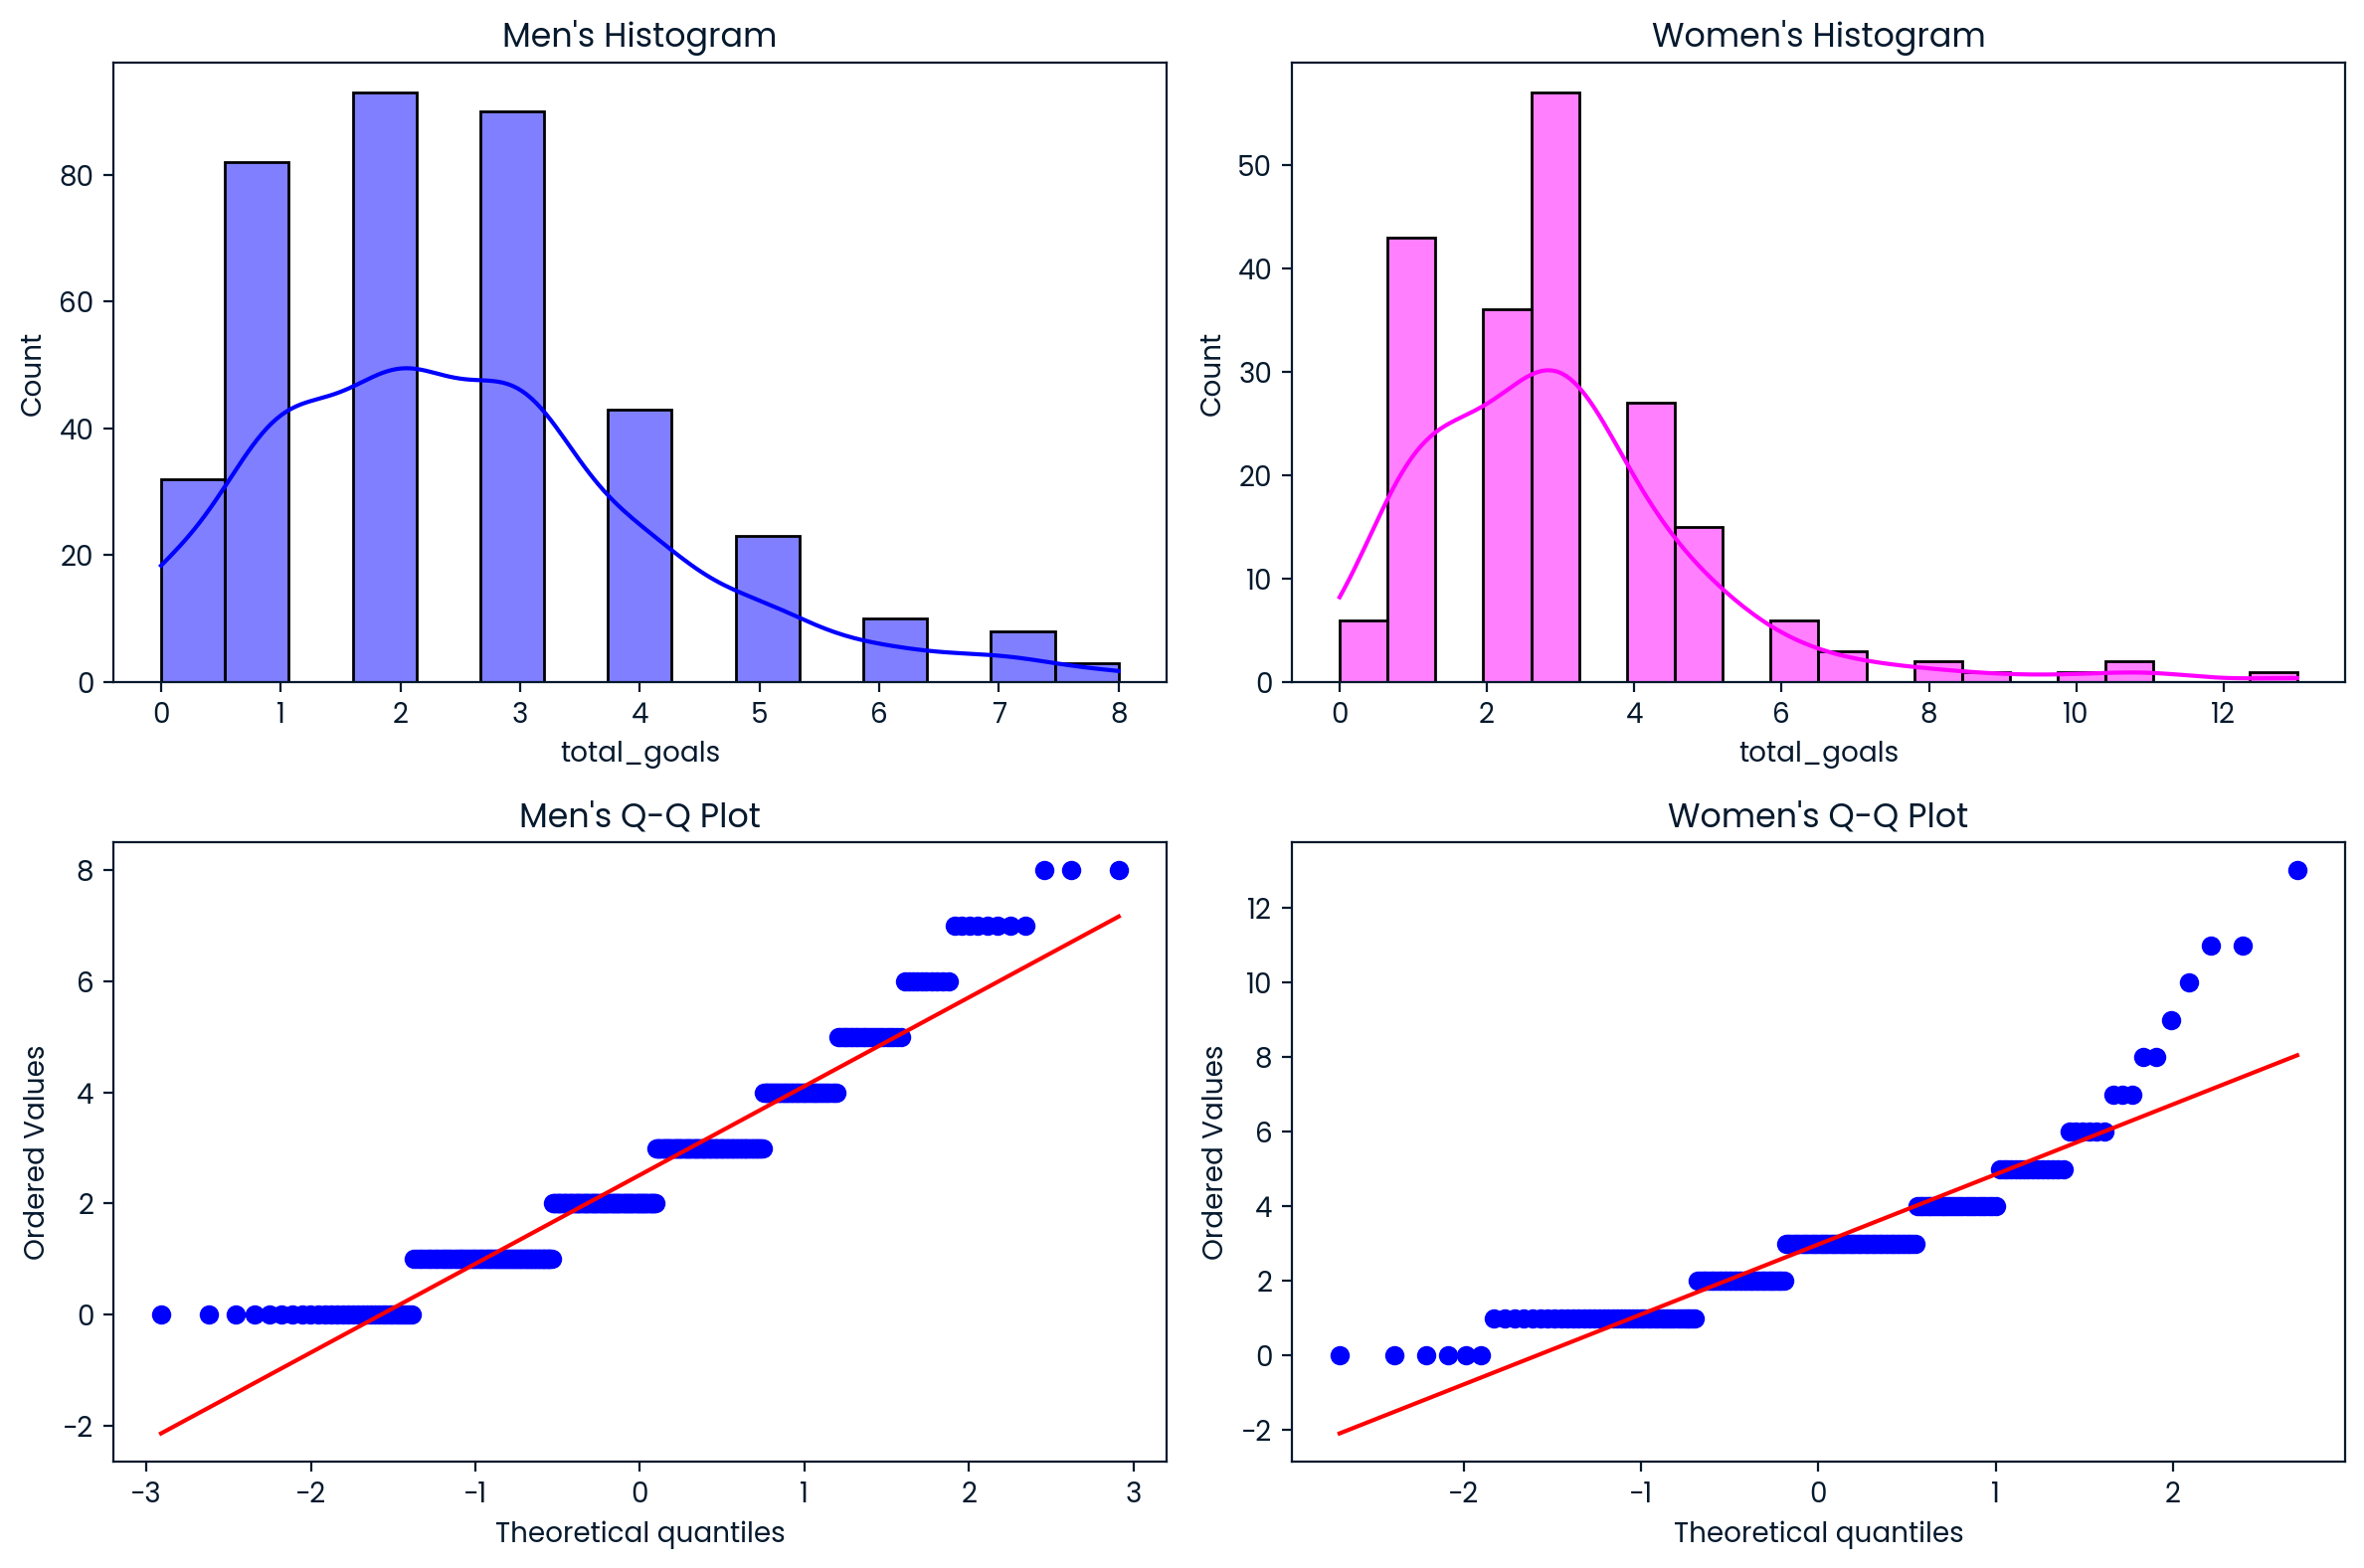

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Replace 'some_metric' with your actual numeric column
metric = 'total_goals'

# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for men
sns.histplot(filtered_men[metric], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Men's Histogram")

# Histogram for women
sns.histplot(filtered_women[metric], kde=True, ax=axes[0, 1], color='magenta')
axes[0, 1].set_title("Women's Histogram")

# Q-Q plot for men
stats.probplot(filtered_men[metric], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("Men's Q-Q Plot")

# Q-Q plot for women
stats.probplot(filtered_women[metric], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Women's Q-Q Plot")

# Adjust layout
plt.tight_layout()
plt.show()

The data does not follow normal distribution based on the diagrams above, the best type of test to use here is **Mann-Whitney U test** which is a non-parametric alternative to the unpaired t-test.

In [176]:
from scipy.stats import mannwhitneyu

alpha = 0.10

u_stat, p_value  = mannwhitneyu(filtered_women['total_goals'], filtered_men['total_goals'], alternative='greater')

print("Mann-Whitney U p-value:", p_value )


Mann-Whitney U p-value: 0.005106609825443641


In [180]:
if p_value < alpha:
    result = "reject"
    print("Reject the null hypothesis: Women score significantly more goals than men.")
    print(result)
else:
    result = "fail to reject"
    print("Fail to reject the null hypothesis: Not enough evidence that women score more goals than men.")
    print(result)

Reject the null hypothesis: Women score significantly more goals than men.
reject


In [178]:
result_dict = {"p_val": p_value , "result": result}